## D19021 - Pooja More - ML2 Assignment- Hyperparameter tuning in Decision Tree, Random Forest and Bagging

### Objective : 
Hyperparameter tuning in Decision Tree, Random Forest and Bagging 

### Contents :
To understand the following concepts :
1. Decision Tree
2. Hyperparameter tuning
3. Hyperparameter tuning in Decision Tree
4. Random Forest
5. Hyperparameter tuning in Random Forest
6. Bagging
7. Basic difference between bagging and random forest.
8. Hyperparameter tuning in bagging.
9. Conclusion

In [65]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve

In [66]:
#Reading the dataset

disease=pd.read_csv("C:\\Users\\pooja\\Desktop\\PYTHON\\ML2\\disease.csv")

In [67]:
#Separating the predictors(X) and responses(Y)

X = disease.drop("target", axis=1)
Y = disease[["target"]]

In [68]:
#Splitting the train test predictors and responses

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

### 1. Decision Tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.
The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. 

#### Strengths :
* Decision trees are able to generate understandable rules.Also it is non-parametric.
* Decision trees perform classification without requiring much computation.
* Decision trees are able to handle both continuous and categorical variables.

#### Weeknesses : 
* Decision trees are prone to errors in classification problems with many class and relatively small number of training examples, as it tries to ovrfit the samples in the model.
* Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.
* Decision tree is an algorithm with high variance.

In [69]:
#Decision Tree with default parameters

dt=DecisionTreeClassifier()

#Training the model on train data 
dt.fit(x_train,y_train)

#Testing the model on test data
pred1=pd.DataFrame(dt.predict(x_test))

In [70]:
#Printing the scores, confusion matrices, the accuracy and the ROC Curve

print("DECISION TREE WITH DEFAULT HYPER PARAMETERS")
print("Train Data Score : ",dt.score(x_train,y_train))
print("Test Data Score : ",dt.score(x_test,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred1))
print("Accuracy Score : ",accuracy_score(y_test,pred1))
print("Classification Report : \n",classification_report(y_test,pred1))
roc_value = roc_auc_score(y_test,pred1)
print("ROC Score : ",roc_value)
fpr1,tpr1,thre1 = roc_curve(y_test,pred1)
print(fpr1,tpr1,thre1)

DECISION TREE WITH DAFAULT HYPER PARAMETERS
Train Data Score :  1.0
Test Data Score :  0.7049180327868853
Confusion Matrix : 
 [[40 18]
 [18 46]]
Accuracy Score :  0.7049180327868853
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        58
           1       0.72      0.72      0.72        64

   micro avg       0.70      0.70      0.70       122
   macro avg       0.70      0.70      0.70       122
weighted avg       0.70      0.70      0.70       122

ROC Score :  0.7042025862068967
[0.         0.31034483 1.        ] [0.      0.71875 1.     ] [2 1 0]


#### Observations :
When we train the Decision Tree model with its default hyperparameter settings, we find that the train data score is **100%**, whereas the test data score is **70.5%**, very less as copared to the train data score.
<br>**Thus here we can conclude that the decision tree has definitely overfitted the training data and is showing high variance on the test data.**

### 2. Hyperparameter Tuning
Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.
This is different from tuning your model parameters where you search your feature space that will best minimize a cost function.
**Hyperparameter tuning** is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. This starts with us specifying a range of possible values for all the hyperparameters. 


#### GridSearchCV() :
GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.
The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**estimator:estimator object.**
<br>This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.

**param_grid:dict or list of dictionaries**
<br>Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

**n_jobs:int or None, optional (default=None)**
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

**verbose:integer**
Controls the verbosity: the higher, the more messages.

In [90]:
#Hyperparameter tuning using GridSearchCV()

#Hyperparameter grid to be passed to the function
max_features=range(1,10)
max_depth = range(1,30)
min_samples_split = range(2,20)
min_samples_leaf = range(1,10)

hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf,max_features=max_features)

gridT = GridSearchCV(dt, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(x_train, y_train)

#printing the final best parameter values
print(gridT.best_params_)

Fitting 3 folds for each of 42282 candidates, totalling 126846 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 3614 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 9614 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 18014 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 28814 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 42014 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 57614 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 75614 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 96014 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 118814 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 126846 out of 126846 | elapsed:  7.0min finished


{'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Observations :
Below are the values for the hyperparameter grid we paseed to the GriSearchCV for Decision Tree
- max_depth : 3, 
- max_features : 4, 
- min_samples_leaf : 2, 
- min_samples_split : 10
<br>Now we will use the above values of hyperpparameter to tune our decision tree model.

### 3. Hyperparameter Tuning in Decision Tree 
The Decision tree complexity has a crucial effect on its accuracy and it is explicitly controlled by the stopping criteria used and the pruning method employed. Usually, the tree complexity is measured by one of the following metrics: the total number of nodes, total number of leaves, tree depth and number of attributes used. max_depth, min_samples_split, and min_samples_leaf are all stopping criteria whereas min_weight_fraction_leaf and min_impurity_decrease are pruning methods. Here we are using the stopping criteria.

#### DecisonTreeClassifier() : 

**criterion: string, optional (default=”gini”):**
<br>The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth: int or None, optional (default=None):**
<br>The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split: int, float, optional (default=2):**
<br>The minimum number of samples required to split an internal node:
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf: int, float, optional (default=1):**
<br>The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**max_features: int, float, string or None, optional (default=None):**
<br>The number of features to consider when looking for the best split:
- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=sqrt(n_features).

In [83]:
#Decision Tree with hyperparameter tuning

dt1=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3,min_samples_split=10,min_samples_leaf=2,max_features=4)
dt1.fit(x_train,y_train)

pred11=pd.DataFrame(dt1.predict(x_test))

In [84]:
#Printing the scores, confusion matrices, the accuracy and the ROC Curve

print("DECISION TREE WITH ADJUSTED HYPERPARAMETERS")
print("Train Data Score : ",dt1.score(x_train,y_train))
print("Test Data Score : ",dt1.score(x_test,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred11))
print("Accuracy Score : ",accuracy_score(y_test,pred11))
print("Classification Report : \n",classification_report(y_test,pred11))
roc_value = roc_auc_score(y_test,pred11)
print("ROC Score : ",roc_value)
fpr,tpr,thre = roc_curve(y_test,pred11)
print(fpr,tpr,thre)

DECISION TREE WITH ADJUSTED HYPERPARAMETERS
Train Data Score :  0.8011049723756906
Test Data Score :  0.7377049180327869
Confusion Matrix : 
 [[41 17]
 [15 49]]
Accuracy Score :  0.7377049180327869
Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        58
           1       0.74      0.77      0.75        64

   micro avg       0.74      0.74      0.74       122
   macro avg       0.74      0.74      0.74       122
weighted avg       0.74      0.74      0.74       122

ROC Score :  0.736260775862069
[0.         0.29310345 1.        ] [0.       0.765625 1.      ] [2 1 0]


#### Observations :
Here we find that when we tune the Decision tree with the best hyperparameters the variance have decreased between the train score and the test score. the train score is **80%** which might be less than the Decision Tree train score without hyperparameter tuning but the test score is **73.7%** which has not just improved, but also this model shows that there is no much overfitting in the tuned model

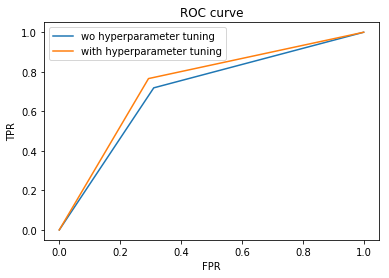

In [85]:
#ROC curve plotting for both Decision tree model with and without hyperparameter tuning

plt.clf()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1,label="wo hyperparameter tuning")
ax.plot(fpr, tpr,label="with hyperparameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

#### Observations : 
The **Orange** curve shows the curve for Decision Tree with hyperparameter tuning thus we could see it is more accurate than the one without hyperparameter tuning shown in **Blue**.

### 4. Random Forest
The reason the decision tree is prone to overfitting when we don’t limit the maximum depth is because it has unlimited flexibility, meaning that it can keep growing until it has exactly one leaf node for every single observation, perfectly classifying all of them. If you go back to the image of the decision tree and limit the maximum depth to 2 (making only a single split), the classifications are no longer 100% correct. We have reduced the variance of the decision tree but at the cost of increasing the bias.
As an alternative to limiting the depth of the tree, which reduces variance (good) and increases bias (bad), we can combine many decision trees into a single ensemble model known as the random forest.

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
<br>1) Random sampling of training data points when building trees
<br>2) Random subsets of features considered when splitting nodes
<br><br>
**The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.**

In [86]:
#Random Forest Classifier with Default hyperparameters
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred2=pd.DataFrame(rf.predict(x_test))

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
#Printing the scores, confusion matrices, the accuracy and the ROC Curve

print("RANDOM FOREST")
print("Train Data Score : ",rf.score(x_train,y_train))
print("Test Data Score : ",rf.score(x_test,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred2))
print("Accuracy Score : ",accuracy_score(y_test,pred2))
print("Classification Report : \n",classification_report(y_test,pred2))
roc_value = roc_auc_score(y_test,pred2)
print("ROC Score : ",roc_value)
fpr1,tpr1,thre1 = roc_curve(y_test,pred2)
print(fpr1,tpr1,thre1)

RANDOM FOREST
Train Data Score :  0.988950276243094
Test Data Score :  0.8032786885245902
Confusion Matrix : 
 [[47 11]
 [13 51]]
Accuracy Score :  0.8032786885245902
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        58
           1       0.82      0.80      0.81        64

   micro avg       0.80      0.80      0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122

ROC Score :  0.8036099137931034
[0.         0.18965517 1.        ] [0.       0.796875 1.      ] [2 1 0]


#### Observations : 
We could see that the Random Forest Model has overfitted the training data with almost **99%** train score where as the test score is **80%** here as well the variance is high, but definitely less than the variance of the Decison Tree without hyperparameter tuning.

### 5. Hyperparameter tuning in Random Forest


#### RandomForestClassifier():
**n_estimators:integer, optional (default=100):**
<br>The number of trees in the forest.

**max_depth:integer or None, optional (default=None):**
<br>The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**max_features:int, float, string or None, optional (default=”auto”) :**
The number of features to consider when looking for the best split:
- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=sqrt(n_features).

**min_samples_split:int, float, optional (default=2):**
The minimum number of samples required to split an internal node:
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf:int, float, optional (default=1):**
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [8]:
#Hyperparameter tuning using GridSearchCV()

#Hyperparameter grid to be passed to the function
n_estimators = range(1,30)
max_features=range(1,10)
max_depth = range(1,15)
min_samples_split = range(2,10)
min_samples_leaf = range(1,10)

hyperT = dict(n_estimators=n_estimators,max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf,max_features=max_features)

gridT = GridSearchCV(rf, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(x_train, y_train)
print(gridT.best_params_)

Fitting 3 folds for each of 263088 candidates, totalling 789264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 659 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1659 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 3059 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 4859 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7059 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9659 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12395 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 14095 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 15995 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 19447 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 24047 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 29047 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 34447 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 40247 tas

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 7}


#### Observations : 
After almost 3 hours of tuning performed by the functions we got the below values for tuning the hyperparameters in RAndom Forest model for our dataset.
- max_depth : 5, 
- max_features : 6, 
- min_samples_leaf : 3, 
- min_samples_split : 7,
- n_estimators : 7
<br>Now we will use the above values of hyperparameter to tune our random forest model.

In [90]:
#Random Forest Classifier with Hyperparameter tuning

rf=RandomForestClassifier(n_estimators=7,max_depth = 5,min_samples_split = 7,min_samples_leaf = 3,max_features=6)
rf.fit(x_train,y_train)
pred21=pd.DataFrame(rf.predict(x_test))

C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [91]:
#Printing the scores, confusion matrices, the accuracy and the ROC Curve

print("RANDOM FOREST WITH TUNED HYPERPARAMETERS")
print("Train Data Score : ",rf.score(x_train,y_train))
print("Test Data Score : ",rf.score(x_test,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred21))
print("Accuracy Score : ",accuracy_score(y_test,pred21))
print("Classification Report : \n",classification_report(y_test,pred21))
roc_value = roc_auc_score(y_test,pred21)
print("ROC Score : ",roc_value)
fpr,tpr,thre = roc_curve(y_test,pred21)
print(fpr,tpr,thre)

RANDOM FOREST WITH TUNED HYPERPARAMETERS
Train Data Score :  0.9116022099447514
Test Data Score :  0.7950819672131147
Confusion Matrix : 
 [[47 11]
 [14 50]]
Accuracy Score :  0.7950819672131147
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        58
           1       0.82      0.78      0.80        64

   micro avg       0.80      0.80      0.80       122
   macro avg       0.80      0.80      0.79       122
weighted avg       0.80      0.80      0.80       122

ROC Score :  0.7957974137931034
[0.         0.18965517 1.        ] [0.      0.78125 1.     ] [2 1 0]


#### Observations :
Thus we can find that here their is less variability between the train score **91.1%** and test score **80%** after the hyperparameter tuning. Also the model is not overfitting unlike Decision Tree as Random forest aggregates the results of all the trees in the model.

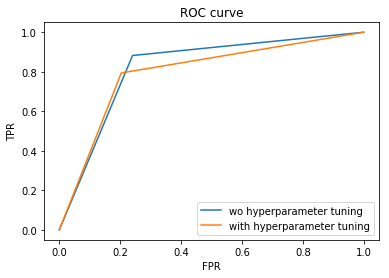

In [59]:
#ROC curve plotting for both Random Forest model with and without hyperparameter tuning

plt.clf()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1,label="wo hyperparameter tuning")
ax.plot(fpr, tpr,label="with hyperparameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

#### Observations :
The accuracy of both the models **Orange** with hyperparameter tuning and **Blue** without hyperparameter tuning is almost same here approx **80%**, but it may differ from sample to sample as overfitting is avoided in the model tuned with hyperparameter.

### 6. Bagging
Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method.
An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees (CART).
Decision trees are sensitive to the specific data on which they are trained. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the predictions can be quite different.Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

### 7. Basic difference between bagging and random forest
The fundamental difference between bagging and random forest is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

A problem with decision trees like CART is that they are greedy. They choose which variable to split on using a greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can have a lot of structural similarities and in turn have high correlation in their predictions.

Combining predictions from multiple models in ensembles works better if the predictions from the sub-models are uncorrelated or at best weakly correlated.

Random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation.

It is a simple tweak. In CART, when selecting a split point, the learning algorithm is allowed to look through all variables and all variable values in order to select the most optimal split-point. The random forest algorithm changes this procedure so that the learning algorithm is limited to a random sample of features of which to search.

In [92]:
#Bagging Classfier with Default parameters

bg=BaggingClassifier()
bg.fit(x_train,y_train)
pred3=pd.DataFrame(bg.predict(x_test))

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#Printing the scores, confusion matrices, the accuracy and the ROC Curve

print("BAGGING CLASSIFIER WITH DEFAULT HYPERPARAMETERS")
print("Train Data Score : ",bg.score(x_train,y_train))
print("Test Data Score : ",bg.score(x_test,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred3))
print("Accuracy Score : ",accuracy_score(y_test,pred3))
print("Classification Report : \n",classification_report(y_test,pred3))
roc_value = roc_auc_score(y_test,pred3)
print("ROC Score : ",roc_value)
fpr1,tpr1,thre1 = roc_curve(y_test,pred3)
print(fpr1,tpr1,thre1)

BAGGING CLASSIFIER WITH DEFAULT HYPERPARAMETERS
Train Data Score :  0.994475138121547
Test Data Score :  0.7704918032786885
Confusion Matrix : 
 [[45 13]
 [15 49]]
Accuracy Score :  0.7704918032786885
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        58
           1       0.79      0.77      0.78        64

   micro avg       0.77      0.77      0.77       122
   macro avg       0.77      0.77      0.77       122
weighted avg       0.77      0.77      0.77       122

ROC Score :  0.7707435344827586
[0.         0.22413793 1.        ] [0.       0.765625 1.      ] [2 1 0]


#### Observations :
Here as well we can find that the Bagging model with default parameter settings is overfitting the training data with train score **99.5%** and that of the test is **77.04%**. This may be also because of the fact that all the trees in Bagging model uses the same set of features for prediction. Thus we need to tune the hyperparameter to avoid the model from overfitting and lower the variance in the train and test score. 

### 8. Hyperparameter tuning in Bagging

#### BaggingClassifier() :
Here we consider only the following parameters

**n_estimators:int, optional (default=10)**
<br>The number of base estimators in the ensemble.

**max_samples:int or float, optional (default=1.0)**
<br>The number of samples to draw from X to train each base estimator.
- If int, then draw max_samples samples.
- If float, then draw max_samples * X.shape[0] samples.

**max_features:int or float, optional (default=1.0)**
<br>The number of features to draw from X to train each base estimator.
- If int, then draw max_features features.
- **If float, then draw max_features * X.shape[1] features.

**bootstrap:boolean, optional (default=True)**
<br>Whether samples are drawn with replacement. If False, sampling without replacement is performed.


In [13]:
#Hyperparameter tuning using GridSearchCV()

#Hyperparameter grid to be passed to the function
n_estimators = range(1,100)
max_features=range(1,10)
max_samples = range(1,30)

hyperT = dict(n_estimators=n_estimators,max_samples = max_samples,max_features=max_features)

gridT = GridSearchCV(bg, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(x_train, y_train)
print(gridT.best_params_)

Fitting 3 folds for each of 25839 candidates, totalling 77517 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 1182 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2888 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4640 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 6590 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8840 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 11390 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 14240 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 17390 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 20374 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 23652 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 26622 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 30480 task

{'max_features': 4, 'max_samples': 23, 'n_estimators': 61}


In [102]:
#Bagging Classfier

bg=BaggingClassifier(n_estimators=61,max_samples =23,max_features=4)
bg.fit(x_train,y_train)
pred31=pd.DataFrame(bg.predict(x_test))

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
#Printing the scores, confusion matrices, the accuracy and the ROC Curve

print("BAGGING CLASSIFIER")
print("Train Data Score : ",bg.score(x_train,y_train))
print("Test Data Score : ",bg.score(x_test,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_test,pred31))
print("Accuracy Score : ",accuracy_score(y_test,pred31))
print("Classification Report : \n",classification_report(y_test,pred31))
roc_value = roc_auc_score(y_test,pred31)
print("ROC Score : ",roc_value)
fpr1,tpr1,thre1 = roc_curve(y_test,pred31)
print(fpr1,tpr1,thre1)

BAGGING CLASSIFIER
Train Data Score :  0.9116022099447514
Test Data Score :  0.8032786885245902
Confusion Matrix : 
 [[40 18]
 [ 6 58]]
Accuracy Score :  0.8032786885245902
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77        58
           1       0.76      0.91      0.83        64

   micro avg       0.80      0.80      0.80       122
   macro avg       0.82      0.80      0.80       122
weighted avg       0.81      0.80      0.80       122

ROC Score :  0.7979525862068966
[0.         0.31034483 1.        ] [0.      0.90625 1.     ] [2 1 0]


#### Observations :
We could find that the overfitting has reduced substantially as compared to the previous bagging model, here the train score is **91.11%** and the test score is **80.3%** which is greater than the test score of the model without hyperparameter tuning. This again may vary according to the samples but the main focus is that overfitting and variance has reduced substantially.

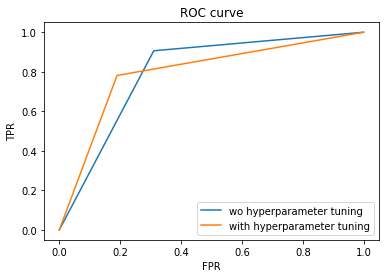

In [104]:
# ROC curve plotting for both the Bagging Models with and without hyperparameter tuning

plt.clf()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1,label="wo hyperparameter tuning")
ax.plot(fpr, tpr,label="with hyperparameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

#### Observations :
The **Orange** curve is for with Hyperparameter tuned model whereas the **Blue** is for the model with default hyperparameters. Looking at the curve we may not be able to figure clearmy figure out which model is better but the accuracy numbers shows that the model with default parameters have accuracy of **77%** and that of the model with tuned hyperparametrs is almost **80%**

### 9. Conclusion 
* From all our observations we understand that **Decision Tree** is more prone to overfitting and high variance, thus we need to tune the hyperparameters to stop the decision tree from growing to its full length(early stopping rule). For this we focused on the hyperparameters like max_depth, max_features, min_samples_leaf, min_samples_split.<br><br>

* In **Bagging** we aggregate the results from all the trees of the Bagging model to get the final response of the oobservation. Here the same set of features is used by all the trees in the model this may be the reason for model overfitting and hence we need to tune them to improve the overall accuracy of the model on the test data. The hyperparameters which we used for tuning are are n_estimators, max_features, max_samples. Thus after hyperparameter tuning we find that the overfitting has reduced and also the accuracy of the model on the test/unseen data has increased.<br><br>

* The only difference between Bagging and random forest is that in **Random Forest** all the trees uses different sets of features to predict the result and then the results are aggregated this itself avaoid random forest upto some extend to overfit the training data and also reduce the variance. In our example we did find that the model was still overfitting the training data so we tuned the hyperparameter by using GridSearchCV and reduced the overfitting and made sure that the model gives less variance overall. A small decrease in performance indicates we have reached diminishing returns for hyperparameter tuning. We could continue, but the returns would be minimal at best.